# <span style="display:block; text-align: center; font-family: 'Franklin Gothic Medium', sans-serif; margin-top: 1.0em; margin-bottom: 0.5em; font-style: italic;">Financial Python</span>

## <span style="display:block; text-align: center; font-family: 'Franklin Gothic Medium', sans-serif;margin-bottom: 1.0em; font-style: italic; font-weight: normal;">Basic Concepts of Fixed Income</span>

### <span style="display:block; text-align: center; font-family: 'Franklin Gothic Book', sans-serif; font-weight: normal;">Chapter One: Basic Bond Concepts and the Term Structure of Interest Rates</span>

<hr style="margin: 8em 0 1em 0;">

<span style="display:block; font-family: 'Garamond', serif; font-size: 10.5px; line-height: 1.3;">

DRAFT CHAPTER FOR PILOT. NOT FOR DISTRIBUTION. This Jupyter Notebook was prepared by Ken Eades, Professor Emeritus of Business Administration, and Pat Hess, Owner, Perceptum Financial Analytics. Copyright © 2025 by the University of Virginia Darden School Foundation, Charlottesville, VA. All rights reserved. *No part of this publication may be reproduced, stored in a retrieval system, used in a spreadsheet, or transmitted in any form or by any means*&mdash;*electronic, mechanical, photocopying, recording, or otherwise*&mdash;*without the permission of the Darden School Foundation. This publication is protected by copyright and may not be uploaded in whole or part to any AI, large language model, or similar system, or to any related training database.* We welcome your feedback on the *Financial Python* pilot program. For any comments or questions related to the pilot and the *Financial Python* users’ group, please contact sales@dardenbusinesspublishing.com. </span>


# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;"> Background</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;"> This chapter uses the Python libraries Pandas and NumPy. The basic usage of these libraries is detailed in two Notebooks: “[A Quick Introduction to Pandas](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html)” reviews some basic concepts of Pandas, and “[A Quick Introduction to NumPy](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_NumPy.html)” does the same for NumPy. These Notebooks are part of the introductory volume [Background Material: An Introduction to Python for Financial Python](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/intro.html). Portions of the volume will be cited throughout this chapter. Feel free to consult these materials as needed for greater discussion of Python concepts.
</span>


# <span style="text-align: left; font-family: 'Franklin Gothic Medium', sans-serif; margin-top: 1.0em; margin-bottom: 0.5em; font-style: italic;">Chapter One: A Road Map
</span>

<span style="display:block; border-left: 12px solid green; padding: 15px;">

1. Python for Bonds and Interest Rates

2. Introduction to Bond Pricing

3. Preparing the Notebook

4. NumPy Arrays

5. Creating a Pandas DataFrame from NumPy Arrays

6. Term Structure: Putting NumPy and Pandas to Work

7. Calculating the Term Structure with Treasury Bills

8. Calculating the Term Structure: A Return

9. Graphing the Term Structure

10. Accessing the T-Bill Data Directly from the Treasury

11. Graphing the Term Structure (Again)

12. Python, Pandas, NumPy, and Financial Insights

**Chapter Exercise: Calculating and Plotting Spot and Forward Rates**

</span>



# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">Python for Bonds and Interest Rates</span>

<span style="display:block;font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
In this chapter, we’ll explore bond calculations and interest through the lens of NumPy and Python DataFrames. These are powerful tools for engaging bond data. Using Treasury bill data, we’ll learn how to create DataFrames and NumPy arrays from CSV files and Microsoft Excel workbooks. All data will be accessed with external URLs, and we’ll calculate the term structure of interest rates on two different datasets. The chapter concludes with an exercise in which you practice calculating and graphing the term structure of interest rates on your own.
</span>



# <span style="font-family:'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">Introduction to Bond Pricing</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">This chapter will introduce some fundamental principles of fixed income. These principles include pricing coupon bonds as a portfolio of zero-coupon bonds, the term structure of interest rates, and the relation between spot and forward rates of interest.
</span>

## <span style="font-family:'Franklin Gothic Book', sans-serif; font-size: 14px; font-weight: 400; margin-left: 0.25in;">The present value of a bond</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">The first chapter of *Time Value of Money* asserted that the value of an asset with certain cash flows equals the present value of its cash flows, as shown in the following equation, where $\ T$ is the total number of cash flow periods, and $\ PV(t)$ is the present-value factor for a certain cash flow in period $t$:
</span>

$$\normalsize Value = \sum_{t=1}^{T}Cash\,Flow_t\times PV(t)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">In finance, equating value with present value is ubiquitous and seems unworthy of much thought. It is, however, a powerful statement that value depends upon the ability to replicate an asset with other assets. Namely, if an asset’s cash flow dates and amounts can be replicated by another asset or combinations of assets, the values must be equal. You might call this idea the *law of one price*&mdash;a concept that is key in all pricing models.
</span>

## <span style="font-family:'Franklin Gothic Book', sans-serif; font-size: 14px; font-weight: 400; margin-left: 0.25in;">Coupon bonds and zero-coupon bonds</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Most bonds, but not all, pay fixed coupons in each period and principal at their maturity. The values of coupon bonds are calculated as:
</span>

$$\normalsize Coupon\, Bond= \sum_{t=1}^{T}Coupon_t\times PV(t)+ Principal_T\times PV(T)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Some bonds only repay principal at maturity, or $T$. Because there are no periodic coupon payments, these bonds are appropriately known as zero-coupon bonds. The values of zero-coupon bonds are calculated as:
</span>

$$\normalsize Zero\,Coupon\, Bond =Principal_T\times PV(T)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">In order to price any bond, it’s necessary to know the present value of payments at the relevant dates. If the zero-coupon bond values are known for the relevant dates, the present value of each date can be determined. To do so, divide the value of the zero-coupon bond by its principal, as shown below:

</span>

$$\normalsize  PV(t)=\frac{Zero\,Coupon\, Bond_t }{Principal_t}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;"> Each coupon-bond cash flow is equivalent to an investment in a zero-coupon bond. As such, we can replicate a coupon bond with a sequence of zero-coupon bonds: The number of zero-coupon bonds with a maturity of $t$ equals the coupon bond’s cash flow at $t$ divided by the zero-coupon bond’s principal. For example, consider a \\$40 coupon that is paid every six months before maturity. This coupon is valued with a sequence of 0.04 zero-coupon bonds, with a \\$1,000 principal and maturities matching the coupon payment dates. The coupon bond’s payment at maturity equals 1.040 zero-coupon bonds, with a \\$1,000 principal and the same maturity as the coupon bond. Further, a coupon bond’s value is the sum of all the zero-coupon bond values needed to replicate that bond’s cash flows. If the coupon bond and the zero-coupon bonds have the same principal, and all the coupon payments of the coupon bond are equal, the value of the coupon bond is:
</span>

$$\normalsize Value = \sum_{t=1}^{T}Zero\,Coupon\,Bond_t\times\frac{Coupon}{Principal}+Zero\,Coupon\,Bond_T$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">We define the sum  as:

</span>

$$\normalsize S(T) =\sum_{t=1}^{T}\frac{Zero\,Coupon\,Bond_t}{Principal} = \sum_{t=1}^{T}PV(t)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
And the value of the fixed-coupon bond is composed of two components equaling:
</span>

$$\normalsize Value = S(T)\times Coupon+PV(T)\times Principal(T)$$

## <span style="font-family:'Franklin Gothic Book', sans-serif; font-size: 14px; font-weight: 400; margin-left: 0.25in;">Arbitrage and the value of the bond</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Thus far, bond values have been represented as the sum of the zero-coupon bonds’ values. But we must consider the zero-coupon bonds’ *market prices*&mdash;not their “theoretical” values. Will the value relation between zero-coupon and coupon bonds hold if we use the market prices of zero-coupon bonds? To answer that question, let’s look at examples where the coupon bond is worth more or less than the sum of the zero-coupon bonds. First, consider a case where the coupon bond’s price exceeds the sum of the zero-coupon bond prices:

</span>

 $$\normalsize Value > S(T)\times Coupon+PV(T)\times Principal(T)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">If the price of the coupon bond exceeds the sum of the zero-coupon bond prices, the coupon bond can be *shorted*.<sup>1</sup> The zero-coupon bonds can then be purchased with the proceeds, leaving the investor with identical cash flows for a lower price. Consider if the inequality is reversed:

</span>

 $$\normalsize Value <  S(T)\times Coupon+PV(T)\times Principal(T)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">In this case, the *zero-coupon bonds* can be shorted, and the proceeds can be used to buy the coupon bond. This ability to recreate cash flows allows for arbitrage between zero-coupon and coupon bonds; as a result, the coupon bond prices equal the costs of the zero-coupon bonds used to recreate their cash flows. It is the law of one price in action. Whatever the bond prices might have been in theory does not matter. Those prices were ideas&mdash;the market value is a fact. This arbitrage relationship is important for deriving the *term of structure of interest rates* and *forward rates*, which we’ll examine later in this chapter. These concepts are key to understanding bond pricing as well as some important fixed-income derivatives.

</span>

<hr>

<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>1</sup>&nbsp;The mechanics of shorting bonds will be discussed in future chapters.
</span>

## <span style="font-family:'Franklin Gothic Book', sans-serif; font-size: 14px; font-weight: 400; margin-left: 0.25in;">Continuous and discrete compounding</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
For mathematical and computational convenience, our discussion of fixed income and bond pricing will use continuously compounded interest rates. At times, it’s appropriate to quote interest rates as discretely compounded rates. To that end, this short aside demonstrates the conversion between continuously and discretely compounded rates.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Suppose that $R_c$ is the continuously compounded annual interest rate for $T$ periods, and $R_d$ is the discretely compounded annual rate for $T$ periods when compounded $d$ times per year. The conversion of continuously and discretely compounded rates requires that the same values are realized in $T$ periods, shown below:
</span>

$$\normalsize e^{R_c\times T}  =  (1 + \frac{R_d}{d})^{d\times T}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">$e$ is Euler’s number and is the limit of $(1+\frac{1}{d})^{d}$ as $d$ approaches infinity or continuously compounds. The necessary condition is expressed as an annualized interest rate by taking the $T$ root of both sides of the equation:
</span>

$$\normalsize e^{R_c} = (1 + \frac{R_d}{d})^{d}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Taking natural logs of the previous equation derives continuously compounded rates from discretely compounded rates:
</span>

$$\normalsize R_c = d\times ln(1 + \frac{R_d}{d})$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Finally, discretely compounded rates can be derived from continuously compounded rates by dividing both sides by the compounding frequency, or
</span>

$$\normalsize \frac{R_c}{d} = ln(1 + \frac{R_d}{d})$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">and raising Euler’s number, $e$, to both sides of the equation:
</span>

$$\normalsize R_d = d\times (e^\frac{R_c}{d} - 1)$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">For instances in which rate conversion is necessary, the above methods are useful knowledge; for this chapter, however, we’ll focus on continuously compounded rates.
</span>

# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;"> Preparing the Notebook</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Importing libraries and functions</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
    It’s good practice to import all required libraries and modules in the first code cell of a Notebook. Unless a new function or module is being introduced, this chapter follows this practice. If a library is already installed, it’s imported to the Notebook. If a library isn’t installed, it’s installed and then imported.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">The standard Python installation includes five module imports: <font color='green'>os</font>, <font color='green'>sys</font>, <font color='green'>requests</font>, <font color='green'>types</font>, and <font color='green'>datetime</font>. The imports <font color='green'>os</font> and <font color='green'>sys</font> facilitate interaction with the operating system. The <font color='green'>requests</font> module enables sending and retrieving data from external URLs; in this notebook, the module is specifically used to access files from Dropbox. The <font color='green'>types</font> module lets us create the module from the Python code accessed from Dropbox. Finally, <font color='green'>datetime</font> allows for the creation and manipulation of date objects.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">The below code imports these modules, and specifically accesses <font color='green'>types</font> and <font color='green'>datetime</font> to import <font color='green'>ModuleType</font> and <font color='green'>date</font>, respectively. <font color='green'>ModuleType</font> will allow us to *instantiate* new modules, and we’ll use <font color='green'>date</font> for our date calculations later.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
import os
import sys
import requests
from types import ModuleType
from datetime import date
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
NumPy and Pandas, though not standard Python libraries, are often preinstalled in Jupyter Notebooks as well as included in Notebook environments like Google Colaboratory (Colab). To ensure library availability, a <font color='green'>try</font> and <font color='green'>except</font> block is used to import NumPy and Pandas in the code below. The <font color='green'>try</font> and <font color='green'>except</font> block is used to resolve instances where the import fails: If the attempted import within the <font color='green'>try</font> segment fails, the <font color='green'>except</font> portion will install the libraries using <font color='green'>pip</font>, a package installer for Python. The exclamation mark preceding <font color='green'>pip</font> indicates that <font color='green'>pip</font> is running through the machine’s console rather than within the Notebook. Upon successful import, NumPy and Pandas are *aliased as* (or assigned the names of) <font color='green'>np</font> and <font color='green'>pd</font>, respectively.<sup>2</sup>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
```
</span>

<span style="display:block;font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The following cell shows our completed code cell for imports.
</span>

<br>
<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>2</sup>&nbsp;For more information on <font color='green'>try</font> and <font color='green'>except</font> statements, see “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/Control_Statements.html#the-try-and-except'>Control Statements</a>.”
</span>

In [ ]:
import os
import sys
import requests
from types import ModuleType
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px;font-weight: 400; margin-left: 0.25in;"> Adding a custom module and importing functions
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;"> Now that we’ve imported our main modules and libraries, we’ll access a custom module for our more specific functions. In the below code, the custom module <font color='green'>module_basic_concepts_fixed_income</font> contains functions utilized by this notebook and others in the volume *Basic Concepts of Fixed Income*. This module is accessed from Dropbox using <font color='green'>requests.get()</font>.
    
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
You have the flexibility to choose the module name; in this instance, <font color='green'>module_basic_concepts_fixed_income</font> is assigned to <font color='green'>module_name</font>. Dropbox provides the URL for access. The module is instantiated with <font color='green'>ModuleType</font> (which we imported earlier) using the chosen <font color='green'>module_name</font>. Once created, the module becomes accessible in the Notebook’s memory, though it is not added to a drive.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='module_basic_concepts_fixed_income'
try:
  response=requests.get(url)
  module=ModuleType(module_name)
```

</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The <font color='green'>exec()</font> function below executes the Python code returned by <font color='green'>requests.get()</font>. It assigns functions and variables to <font color='green'>sys.module[module_name]</font>. This makes the module available for use in the Notebook.

</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
exec(response.text,module.__dict__)
sys.module[module_name]=module
```

</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
We’ll then import two functions from the module: <font color='green'>parent_folder_subfolder</font> and <font color='green'>one_y_axis</font>. The former determines locations for saving and accessing files and can be <a href='https://patrickjhess.github.io/Imported-Functions/parent_folder_subfolder.html#parent-folder-subfolder-is-a-helper-function-for-saving-files-created-by-financial-python'>viewed here</a>. The latter plots calculation results and can be <a href='https://patrickjhess.github.io/Imported-Functions/one_y_axis.html#one-y-axis-is-a-helper-function-for-plotting-graphs-created-by-financial-python'>viewed here</a>.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
from basic_concepts_fixed_income import(parent_folder_subfolder,
                                       one_y_axis)
```

</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Our now-complete code is shown in the cell below.

</span>

In [ ]:
# Define the URL of the Python module to be downloaded from Dropbox.
# The 'dl=1' parameter in the URL forces a direct download of the file content.
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='basic_concepts_fixed_income'
# Send an HTTP GET request to the URL and store the server's response.
try:
  response=requests.get(url)
  # Raise an exception for bad status codes (like 404 Not Found)
  response.raise_for_status()
  module= ModuleType(module_name)
  #Code contained in response.text executed
  exec(response.text, module.__dict__)
  # Module added to sys
  sys.modules[module_name]=module
except requests.exceptions.RequestException as e:
    print(f"❌ Error: Could not fetch module from URL. {e}")
except Exception as e:
    print(f"❌ Error: Failed to execute or import the module. {e}")
# Open the local file in "write binary" ('wb') mode and save the downloaded content.
# Using a 'with' statement ensures the file is properly closed after writing.

# Now that 'basic_conepts_fixed_income' exists in the notebook, import the specific functions
from basic_concepts_fixed_income import(parent_folder_subfolder,
                                        one_y_axis)

# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">NumPy Arrays</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The NumPy library offers efficient numerical procedures that simplify complex calculations.<sup>3</sup> The fundamental object in this library is the NumPy array. An array is simply a data structure in which elements are arranged and accessed. It can be formed from a single value or from an iterable data type like a list, which holds a series of values.<sup>4</sup> NumPy must be imported before use; recall that in this Notebook, it was imported and aliased as <font color='green'>np</font> in the first code cell. The <font color='green'>array()</font> method is used to convert variables into NumPy arrays.<sup>5</sup> The following code creates an array from the list <font color='green'>[3%, 5%, 7%]</font> (lists are stylized with square brackets) and assigns that array to <font color='green'>interest_rates</font>. This is then passed to <font color='green'>display()</font>, which simply displays the contents of <font color='green'>interest_rates</font>.
</span>


<br>
<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>3</sup>&nbsp;For more information on NumPy, see “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_NumPy.html#numpy'>A Quick Introduction To NumPy</a>.”</span><br>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>4</sup>&nbsp;For more information on list objects, see “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/A_First_Look_At_Lists.html#a-first-look-at-lists'>A First Look at Lists</a>.”</span><br>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>5</sup>&nbsp;Like other libraries, the alias <font color='green'>np</font> must be appended to the method, as in <font color='green'>np.array</font> instead of <font color='green'>array</font>.
</span>

In [ ]:
interest_rates=np.array([0.03,0.05,0.07])
display(interest_rates)

array([0.03, 0.05, 0.07])

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">NumPy calculations</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Now that we’ve created an array and assigned it to <font color='green'>interest_rates</font>, we can perform calculations on that array. NumPy calculates array elements individually. For instance, the <font color='green'>exp()</font> method used below raises each element of <font color='green'>interest_rates</font> to Euler’s number, $e$. This approach is faster and more convenient than iterating through the rates.
</span>

In [ ]:
display(np.exp(interest_rates))

array([1.03045453, 1.0512711 , 1.07250818])

# <span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; font-size: 22px; margin-top: 1.0em; margin-bottom: 0.5em; font-style: italic;">Application: Create a NumPy Array</span>


<span style="display:block;background-color:LightGray;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 15px;
    line-height: 1.5;
    padding: 15px">
    <br>
Create a NumPy array of the present-value factors for the rates of <font color='green'>interest_rates</font>. For hints, see [Chapter One Hints: Create a NumPy Array](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#create-a-numpy-array), and check the [expected results here](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#create-a-numpy-array).
<br>
<br>
</span>


## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Two-dimensional NumPy arrays </span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The <font color='green'>pv_rates</font> array in the code below is a *two-dimensional* NumPy array (or matrix). It’s created by combining two one-dimensional arrays&mdash;<font color='green'>interest_rates</font> and <font color='green'>pv_factors</font>&mdash;within the <font color='green'>array()</font> method. To access the rows of this two-dimensional array, we’ll use the corresponding row *index* value. (The index value is simply an element’s sequential position in the array. Remember that in programming, sequences begin at position 0, not 1). Finally, both the interest rates and present-value factors are displayed below using *f-strings*. These are like strings, but begin with an “f” and are used to include variables and expressions within a string. The variable must be enclosed in curly brackets (i.e., { }), and the indexed value must be enclosed in square brackets ([ ]).
</span>


In [ ]:
#A calculation is made for each element of a numpy array
pv_factors=1/np.exp(interest_rates)
pv_rates=np.array([interest_rates,pv_factors])
display(pv_rates)
#Create an f string for each row.
#Each row must also be encapsulated in curly brackets
display(f'Interest Rates {pv_rates[0]}')
display(f'Present Value Factors {pv_rates[1]}')

array([[0.03      , 0.05      , 0.07      ],
       [0.97044553, 0.95122942, 0.93239382]])

'Interest Rates [0.03 0.05 0.07]'

'Present Value Factors [0.97044553 0.95122942 0.93239382]'

# <span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; font-size: 22px; margin-top: 1.0em; margin-bottom: 0.5em; font-style: italic;">Application: Manipulate a Two-Dimensional Array</span>

<span style="display:block;background-color:LightGray;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 15px;
    line-height: 1.5;
    padding: 15px">
    <br>
Create a two-dimensional array by raising the interest-rate row to Euler’s number and multiplying the results by the present value factors. For hints, see [Chapter One Hints: Manipulate a Two-Dimensional Array](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#manipulate-two-dimensional-array), and check the [expected results here](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#manipulate-two-dimensional-array).
<br>
<br>
</span>


# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;"> Creating a Pandas DataFrame from NumPy Arrays</span>
## <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-weight: 400; margin-left: 0.25in;">A simple example</span>
<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
       The Pandas library is a powerful resource for data analysis. Recall that like NumPy, we imported Pandas in our earlier code cell. For this section, we’ll be using Pandas to access a structure called a *DataFrame*. A Pandas DataFrame organizes data into rows and columns, much like an Excel spreadsheet or a NumPy array. It can be created from a two-dimensional array, such as our newly created <font color='green'>pv_rates</font>. The simplest DataFrames automatically assign row and column index values; a more functional approach allows for the explicit naming of both. In the simple example below, the <font color='green'>DataFrame()</font> method of Pandas uses three arrays as arguments, generating a row for each array.
</span>


In [ ]:
# Dataframe created with DataFrame() method
simple_example=pd.DataFrame((interest_rates,
              np.exp(interest_rates),
              1/np.exp(interest_rates)))
display(simple_example)

,0,1,2
0,0.030000,0.050000,0.070000
1,1.030455,1.051271,1.072508
2,0.970446,0.951229,0.932394


# <span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; font-size: 22px; margin-top: 1.0em; margin-bottom: 0.5em; font-style: italic;">Application: Create a DataFrame from a Two-Dimensional Array</span>

<span style="display:block;background-color:LightGray;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 15px;
    line-height: 1.5;
    padding: 15px">
    <br>
Create a DataFrame with the two-dimensional array <font color='green'>pv_rates</font>. For hints, see [Chapter One Hints: Create A DataFrame From A Two-Dimensional Array](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#create-a-dataframe-from-a-two-dimensional-array), and check the [expected results here](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#create-a-dataframe-from-a-two-dimensional-array).
<br>
<br>
</span>


## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Making rows into columns and labeling the columns</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
In the below code, rows are converted to columns by using the <font color='green'>transpose()</font> method on our earlier DataFrame, <font color='green'>simple_example</font>. This method changes the rows into columns.<sup>6</sup> The transposed result is then assigned to <font color='green'>rows_to_columns</font>, and the columns are then assigned the elements of a list (<font color='green'>['Rates', 'Future Value', 'Present Value']</font>).  Transposing the DataFrame makes <font color='green'>'Rates'</font>, <font color='green'>'Future Value'</font>, and <font color='green'>'Present Value'</font> the variables and makes the rows the observations of those variables.

</span>
<br>
<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>6</sup>&nbsp;The method can also be applied as simply <font color='green'>T</font>. See “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#the-transpose'>A Quick Introduction To Pandas</a>.”

</span>



In [ ]:
#transpose the simple_example dataframe and call it rows_to_columns
rows_to_columns=simple_example.transpose()
#(the transpose method can also be written as simple_example.T)
rows_to_columns.columns=['Rates','Future Value','Present Value']
display(rows_to_columns)

,Rates,Future Value,Present Value
0,0.03,1.030455,0.970446
1,0.05,1.051271,0.951229
2,0.07,1.072508,0.932394


## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">The set_index() method</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Once the DataFrame has been transposed, the next step is to make the <font color='green'>Rates</font> column the index.  Why? The reason is that the values of <font color='green'>Rates</font> determine the values of the columns <font color='green'>Future Value</font> and <font color='green'>Pesent Value</font>. This change isn’t necessary, but it draws our eye to a natural connection. Instead of an index that points only to a row number, the new index points to the rate that results in the future and present values.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">The method <font color='green'>set_index()</font> takes a column name and removes the column from the DataFrame. Pandas has a built-in *fail-safe-switch*. By default, this change (and others we’ll encounter later) doesn’t permanently alter the DataFrame. This might seem a bit strange, but this characteristic prevents mistakes that are difficult to fix. To make the change permanent, you can do the following:<sup>7</sup>
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.5in;
    line-height: 1.5;">
1.&nbsp;Assign the transposed value of the DataFrame to another DataFrame:
</span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
name_index_set_index=rows_to_columns.set_index('Rates')
display(name_index_set)
display(rows_to_columns)
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.5in;
    line-height: 1.5;">
2.&nbsp;Change the default value of the <font color='green'>inplace</font> argument of <font color='green'>set_index</font> to <font color='green'>True</font>:
</span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
rows_to_columns.set_index('Rates',inplace=True)
display(rows_to_columns)
```
</span>
<br>
<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>7</sup>&nbsp;See “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#making-a-column-the-index'>A Quick Introduction To Pandas</a>.”

</span>


In [ ]:
name_index_set_index=rows_to_columns.set_index('Rates')
display(name_index_set_index)
display(rows_to_columns)
rows_to_columns.set_index('Rates',inplace=True)
display(rows_to_columns)

,Future Value,Present Value
Rates,,
0.03,1.030455,0.970446
0.05,1.051271,0.951229
0.07,1.072508,0.932394


,Rates,Future Value,Present Value
0,0.03,1.030455,0.970446
1,0.05,1.051271,0.951229
2,0.07,1.072508,0.932394


,Future Value,Present Value
Rates,,
0.03,1.030455,0.970446
0.05,1.051271,0.951229
0.07,1.072508,0.932394


# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;"> Term Structure: Putting NumPy and Pandas to Work</span>
    
<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">The *term structure of interest rates* (term structure) describes how interest rates vary over time. It’s a critical financial metric reflected in the pricing or valuation of almost all assets.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">NumPy and Pandas are powerful tools that greatly simplify the manipulation and calculation of extensive and complex financial data. In this section, we’ll explore their application in calculating the term structure on various dates, a process that requires accessing large datasets and performing numerous calculations. These libraries will prove essential for this task.
</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Calculating term structure</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">The earlier discussion of bond pricing described the price of a zero-coupon bond as its maturity value multiplied by the present-value factor. A NumPy array and a Pandas DataFrame included interest rates, future values, and present-value factors. These same concepts are used to calculate term structure.</span>

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Spot rates of interest</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Put simply, term structure is the relation between the annualized interest rates of zero-coupon bonds, or the *spot rate* of interest, and the bonds’ maturities. The price of a zero-coupon bond with a maturity of $t$ and a principal of \$1 is:</span>

$$\normalsize P(t) = e^{ -r_t\times t}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The annualized continuously-compounded interest rate of the $t$-period zero-coupon bond is:
</span>

$$\normalsize r_t = \frac{-ln(P(t))}{t}$$
<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
with $r_t$ representing the spot rate of interest for $t$ periods. As such, if a zero-coupon bond pays \\$1 in six months and has a price of \\$0.9753, the spot rate of interest is:</span>

$$\normalsize 5\% = \frac{-ln(0.9753)}{0.5}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The spot rate reflects a return that begins immediately for a specific period of time. To consider future periods, we turn to *forward rates*.</span>



### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Forward rates of interest</span> 

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The forward rate of interest represents the additional return gained by extending an investment’s duration&mdash;or the extra earnings from investing for two months instead of one, for example. When two bonds offer an identical single payment at maturity, the forward rate between the shorter and longer maturities is determined by the ratio of their respective prices.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
For zero-coupon bonds with a principal of \\$1, the calculation of one plus the forward rate between $t$ and $t+\Delta t$ is:<br></span>


$$\normalsize\frac{\frac{1}{P(t+\Delta t)}}{\frac{1}{P(t)}}= e^{f(t,t+\Delta t)\times\Delta t}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
simplified to</span>

$$\normalsize\frac{P(t)}{P(t+\Delta t)}= e^{f(t,t+\Delta t)\times\Delta t}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The continuously-compounded annualized forward rate between $t$ and $t+\Delta t$ is:</span>



$$\normalsize f(t,t+\Delta t) = \frac{ln(P(t)) - ln(P(t+\Delta t))}{\Delta t}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The forward rates can be locked in by purchasing a zero-coupon bond that matures in $\large t+\Delta t$ periods and for $t$ periods, borrowing $P(t+\Delta t)$ today at the rate $P(t)^{-1}.$ At $t$, the borrowing is repaid, and at $t +\Delta t$, the zero-coupon bond matures and pays \$1. The borrowing, repayment, and locked-in rate-of-return calculations are shown below.</span>


$$\normalsize Amount\,Borrowed =P(t+\Delta t)$$
$$\normalsize Repayment = P(t+\Delta t)\times\frac{1}{P(t)}$$
$$\normalsize Locked\,In\,Rate\,of\,Return = \frac{1}{\frac{P(t+\Delta t)}{P(t)}}-1 =\frac{P(t)}{P(t+\Delta t)}-1$$


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The continuously-compounded annualized locked-in rate of return equals:</span>


$$\normalsize\frac{ln(P(t)) -ln(P(t+\Delta t))}{\Delta t}$$


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
This value is the same as the continuously-compounded forward rate of interest between $t$ and  $\ t+\Delta t$.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Although it might seem obvious that the locked-in rate of return and the forward rate are equal, this result is significant. Imagine an investor who intends to invest at the future date $t$ for $\Delta t$ periods. The investor can</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.5in;
    line-height: 1.5;">
1.&nbsp; wait until $t$ to invest at the unknown spot rate $\ r(t,t+\Delta t)$, or</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.5in;
    line-height: 1.5;">
2.&nbsp; lock in a rate of return today that equals the current forward rate $\ f(t,t+\Delta t)$.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
In a state of equilibrium, the prices of zero-coupon bonds ensure that investors are indifferent to either securing a spot rate immediately or deferring investment until a future, unknown spot rate. The choice between rolling over a short-term investment and making a long-term one essentially hinges on expectations for future interest rates. Similar to the odds in a sports wager, the forward rate represents a fair-bet value for these future unknown spot rates, thereby making investors indifferent to their investment duration. Although forward rates forecast future spot rates, the forecasts might not be the expected values.<sup>8</sup></span>

<br>
<hr>

<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>8</sup>&nbsp; This statement presumes that future spot rates are uncertain. If future spot rates are known, forward rates will equal future spot rates.
</span>



# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;"> Calculating the Term Structure of Interest Rates with Treasury Bills</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Treasury bills, or T-bills, mature in a year or less and make a single principal payment at maturity. In this section, we’ll apply the Python concepts we’ve learned so far to T-bill data, using the bills to demonstrate the term structure between one month and one year. Because the bills make a single payment, their prices are determined by the single spot rate of interest at maturity.
</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Python and finance in action</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">This example will outline two Python concepts integral to financial calculations. First, it will demonstrate how to leverage the Pandas library to access Excel workbooks from a URL and convert them into DataFrames&mdash;a highly effective skill given Excel’s widespread use in the finance world. The Pandas method we’ll use is <font color='green'>read_excel</font>.<sup>9</sup> Second, this example will illustrate the valuable data manipulation techniques available through Pandas, specifically focusing on how the attributes <font color='green'>loc</font> and <font color='green'>iloc</font> and the method <font color='green'>get_indexer</font> are used to retrieve the necessary data for calculations.<sup>10</sup></span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Measuring the term structure is a key financial skill. The term structure of interest rates is a critical indicator of financial market conditions. Its explanation, along with the concepts necessary for its calculation, represents the most significant aspect of this example. The relationships between past, present,and future market conditions are all expressed by measuring the term structure.</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Getting T-bill data</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">T-bill data is available from the US Department of the Treasury (Treasury) at the department’s <a href='https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value_month=202409'>Daily Treasury Bill Rate page</a>. The data used in this example is for September&nbsp;2022 and was uploaded to the authors’ Dropbox as an Excel workbook.</span>

 ### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Accessing the data</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The Pandas magic used to read a an Excel workbook from a URL is <font color='green'>read_excel()</font>. The arguments of the method are:</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.5in;
    line-height: 1.5;">
1.&nbsp; The website address, or <font color='green'>url</font>. This argument is required.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.5in;
    line-height: 1.5;">
2.&nbsp; The columns used as the index, or <font color='green'>index_col</font>. This argument is optional and is assigned to the <font color='green'>Date</font> column.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The below code assigns the Dropbox URL to <font color='green'>url</font> and sets <font color='green'>index_col</font> to <font color='green'>Date</font>, then passes both through our <font color='green'>read_excel()</font> method to give us <font color='green'>Tbill_data_excel</font>.
</span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
url='https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/\
daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1'
Tbill_data_excel=pd.read_excel(url, index_col='Date')
```
</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Creating a DataFrame from an Excel file</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Let’s now turn this snippet into useable code. In the following code cell, an Excel workbook is accessed from Dropbox, which provides the URL. The Pandas method <font color='green'>read_excel()</font> is used to read and assign the data to <font color='green'>Tbill_data_excel</font>. The <font color='green'>Date</font> column is assigned as the index. Notice here that <font color='green'>try</font> and <font color='green'>except</font> are used to alert us if the file is not available.</span>
<br>
<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
9.&nbsp;More on Pandas methods and Excel files can be found at “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#dataframes-csv-and-excel-files'>A Quick Introduction To Pandas</a>.”</span><br>

<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
10.&nbsp;<font color='green'>loc</font> and <font color='green'>iloc</font> are covered in greater depth in “<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#the-loc-and-iloc-attributes'>A Quick Introduction To Pandas</a>.”
</span>


In [ ]:
#The full file path.
url='https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/\
daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1'
print(f"Attempting to load data from: {url}")

#Load the data from Excel, using the Date column as the index.
try:
    Tbill_data_excel = pd.read_excel(url, index_col='Date')

    # Display the loaded DataFrame to verify it worked.
    display(Tbill_data_excel)

except FileNotFoundError:
    print("\nERROR: File not found.")
    print("Please check that the 'URL' address")

Attempting to load data from: https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1


,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
Date,,,,,,,,,,
2022-09-30,2.70,2.74,3.07,3.13,3.22,3.29,3.82,3.95,3.87,4.03
2022-09-29,2.68,2.72,3.08,3.14,3.26,3.33,3.78,3.91,3.80,3.96
2022-09-28,2.50,2.54,2.96,3.01,3.29,3.36,3.78,3.91,3.81,3.97
2022-09-27,2.60,2.64,2.99,3.05,3.26,3.33,3.83,3.96,3.97,4.14
2022-09-26,2.64,2.68,2.99,3.05,3.30,3.37,3.87,4.00,3.98,4.15
2022-09-23,2.59,2.63,2.95,3.00,3.12,3.19,3.76,3.88,3.97,4.14
2022-09-22,2.65,2.69,2.98,3.04,3.19,3.26,3.78,3.91,3.90,4.07
2022-09-21,2.46,2.50,2.89,2.94,3.21,3.28,3.77,3.90,3.90,4.07
2022-09-20,2.47,2.51,2.88,2.93,3.26,3.33,3.77,3.90,3.87,4.04


## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Accessing rows of a Pandas DataFrame</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
We’ve now created a DataFrame, but we still need to access its contents. Three common ways of accessing the rows of a DataFrame are the attributes <font color='green'>loc</font> (as in “location”) and <font color='green'>iloc</font> (as in “integer location”) and the method <font color='green'>get_indexer()</font>. All three ways access rows by the value of the index.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The <font color='green'>loc</font> attribute of a DataFrame accesses a row by using its index value. In the below code, the specific value of the index <font color='green'>'09/15/2022'</font> is accessed. If the value is not in the index, an error is returned via <font color='green'>except</font>. There are only 30 days in September, so <font color='green'>'09/31/2022'</font> fails and the message <font color='green'>'Value Not in Index'</font> is displayed.
</span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
try:
  display(Tbill_data_excel.loc['09/15/2022'])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.loc['09/31/2022'])
except:
  display('Value Not in Index')
```
</span>



In [ ]:
try:
  display(Tbill_data_excel.loc['09/15/2022'])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.loc['09/31/2022'])
except:
  display('Value Not in Index')

,2022-09-15
4 WEEKS BANK DISCOUNT,2.68
4 WEEKS COUPON EQUIVALENT,2.72
8 WEEKS BANK DISCOUNT,2.92
8 WEEKS COUPON EQUIVALENT,2.97
13 WEEKS BANK DISCOUNT,3.12
13 WEEKS COUPON EQUIVALENT,3.19
26 WEEKS BANK DISCOUNT,3.69
26 WEEKS COUPON EQUIVALENT,3.81
52 WEEKS BANK DISCOUNT,3.83
52 WEEKS COUPON EQUIVALENT,4.00


'Value Not in Index'

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The <font color='green'>iloc</font> attribute accesses a row by its indexed integer value. In this case, the <font color='green'>Date</font> column <font color='green'>'09/15/2022'</font> has an index value of 11. If the integer value is not present, an error is returned, as in the earlier code. The DataFrame has 21 rows, and so the index value of 45 fails, as shown below. </span> 

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
try:
  display(Tbill_data_excel.iloc[11])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.loc[45'])
except:
  display('Value Not in Index')
```
</span>




In [ ]:
try:
  display(Tbill_data_excel.iloc[11])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.iloc[45])
except:
  display('Value Not in Index')

,2022-09-15
4 WEEKS BANK DISCOUNT,2.68
4 WEEKS COUPON EQUIVALENT,2.72
8 WEEKS BANK DISCOUNT,2.92
8 WEEKS COUPON EQUIVALENT,2.97
13 WEEKS BANK DISCOUNT,3.12
13 WEEKS COUPON EQUIVALENT,3.19
26 WEEKS BANK DISCOUNT,3.69
26 WEEKS COUPON EQUIVALENT,3.81
52 WEEKS BANK DISCOUNT,3.83
52 WEEKS COUPON EQUIVALENT,4.00


'Value Not in Index'

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Rounding out our Pandas tools, the method <font color='green'>get_indexer()</font> returns the indexed integer values for a specific value of the index as an array. In the below example, an array with a single value is returned. For the Date <font color='green'>'09/15/2022'</font> the value 11 is returned. The <font color='green'>get_indexer()</font> method returns −1 for missing values, which avoids interrupting the code.
</span>

<span style="display:block; margin-left: 1in;">

```
displayT(bill_data_excel.index.get_indexer(['09/15/2022'])
displayT(bill_data_excel.index.get_indexer(['09/31/2022'])
```

</span>


In [ ]:
#return row number for date '09/15/2022'
display(Tbill_data_excel.index.get_indexer(['09/15/2022']))
#September has only 30 days, value of -1 returned
display(Tbill_data_excel.index.get_indexer(['09/31/2022']))

array([11])

array([-1])

# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">Calculating the Term Structure: A Return</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Having gathered the bond data, we can return to calculating the term structure. Recall that the price of a T-bill (a zero-coupon bond) is its principal discounted back at the annualized continuous spot rate of interest. The forward rate of interest is the difference of the natural logs of the prices of a shorter maturity and a longer maturity zero-coupon bond. To calculate the term structure, we need to first calculate the prices of the T-bills (the zero-coupon prices).
</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Bank discounts and coupon equivalent yields
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
T-bills are quoted as bank discounts or coupon-equivalent yields. T-bill prices are 100 less a bank discount annualized with a 360-day year.</span>

$$\normalsize Bill\,Price = 100 - bank\,discount\times\frac{Maturity\,In\,Days}{360}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The bank discount of the four-week bill on September 15th is 2.68%, which implies a bill price of:</span>

$$\normalsize 99.792 = 100 - 2.68\times\frac{28}{360}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The coupon equivalent is the annualized rate of return that is calculated with the convention of *365 days* per year. The calculation is the actual rate of return (the gain on the bill divided by the bill price) multiplied by 365 divided by the maturity of the bill in days. A four-week bill matures in 28 days, and its coupon equivalent is:</span>

$$\normalsize Coupon\,Equivalent =\frac{100 - Bill\,Price}{Bill\,Price}\times\frac{365}{28}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
And a coupon equivalent of:</span>

$$\normalsize 2.72\% =\frac{100 - 99.792}{99.79}\times\frac{365}{28}$$


## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Calculating bond prices with bank discounts
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
In the <font color='green'>Tbill_data_excel</font> DataFrame, columns are either <font color='green'>*BANK DISCOUNT*</font> or <font color='green'>*COUPON EQUIVALENT*</font>. We’ll construct a NumPy array <font color='green'>bank_discount</font> from the <font color='green'>*BANK DISCOUNT*</font> columns. In the following code, the list <font color='green'>desired_columns</font> is created with list comprehension from the columns attribute of <font color='green'>Tbill_data_excel</font>. If the string <font color='green'>'BANK'</font> is in the column name, that column name is added to the list <font color='green'>desired_columns.</font><sup>11</sup></span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
desired_columns=[column for column in Tbill_data_excel.columns if 'BANK' in column]
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The column is only added when the <font color='green'>if</font> statement is true. The <font color='green'>df_bankers_discount</font> DataFrame is created by including the <font color='green'>desired_column</font> lists as the columns of the <font color='green'>Tbill_data_excel</font> DataFrame, as shown below.</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
df_bankers_discount=Tbill_data_excel[desired_columns]
display(df_bankers_discount[:5])
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Having the bank discount in NumPy arrays will allow for an easy conversion to bill prices. We can convert <font color='green'>df_bankers_discount</font> into a two-dimensional NumPy array <font color='green'>bankers_discount</font> with the Pandas method <font color='green'>to_numpy()</font>. The first five rows of the array are shown below.<sup>12</sup></span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
bankers_discount=df_bankers_discount.to_numpy()
display(bankers_discount[:5])
```
</span>

<br>

<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

<sup>11</sup>&nbsp;As shown in the following code, the desired columns could be selected with a <font color='green'>for</font> loop. For greater discussion of list comprehension as well as <font color='green'>for</font> loops, see “[A First Look at Lists](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/A_First_Look_At_Lists.html#create-a-list-by-iterating-through-a-string-list-comprehension-for-loop).”
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```

desired_columns=[]
for column in Tbill_data_excel.columns:
  if 'BANK' in column:desired_columns.append(column)
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">
<sup>12</sup>&nbsp; See “[A Quick Introduction to Pandas](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#pandas-to-numpy)” for discussion of converting Pandas to NumPy.</span>


In [ ]:
# Create a list called 'desired_columns' using a list comprehension.
desired_columns = [column for column in Tbill_data_excel.columns if 'BANK' in column]

# Create a DataFrame named 'df_bankers_discount' and 'bankers_discont'.
df_bankers_discount = Tbill_data_excel[desired_columns]
bankers_discount=df_bankers_discount.to_numpy()
# Display the first 5 rows of the newly created 'df_bankers_discount' DataFrame.
display(df_bankers_discount[:5])
display(bankers_discount[:5])

,4 WEEKS BANK DISCOUNT,8 WEEKS BANK DISCOUNT,13 WEEKS BANK DISCOUNT,26 WEEKS BANK DISCOUNT,52 WEEKS BANK DISCOUNT
Date,,,,,
2022-09-30,2.70,3.07,3.22,3.82,3.87
2022-09-29,2.68,3.08,3.26,3.78,3.80
2022-09-28,2.50,2.96,3.29,3.78,3.81
2022-09-27,2.60,2.99,3.26,3.83,3.97
2022-09-26,2.64,2.99,3.30,3.87,3.98


array([[2.7 , 3.07, 3.22, 3.82, 3.87],
       [2.68, 3.08, 3.26, 3.78, 3.8 ],
       [2.5 , 2.96, 3.29, 3.78, 3.81],
       [2.6 , 2.99, 3.26, 3.83, 3.97],
       [2.64, 2.99, 3.3 , 3.87, 3.98]])

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Going from bankers’ discounts to zero prices</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
As noted earlier, the price of a bill with a $100 par value is:</span>

$$\normalsize Bill\,Price = 100 - bank\,discount\times\frac{Maturity\,In\,Days}{360}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The price of one dollar, or the the zero price, is:</span>

$$\normalsize \frac{100-bank\,discount\times\frac{Maturity\,In\,Days}{360}}{100}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The maturity of the bills are 4, 8, 13, 26, and 52 weeks. In the following code, the NumPy array <font color='green'>maturity_days</font> is created by multiplying the number of weeks by seven. The <font color='green'>zero_price_one</font> array is calculated by multiplying <font color='green'>bankers_discount</font> by <font color='green'>maturity_days</font>, annualized with 360 days per year. We then divide by 100 to convert the value to a percentage.</span>



In [ ]:
maturity_days=np.array([4*7,8*7,13*7,26*7,52*7]) #Maturity in days calculated
#The price formula divides maturity days by 360 to annualize
#Then divides by to convert to a bill paying one dollar.
zero_prices_one=(100-bankers_discount*maturity_days/360)/100
#NumPy performs element by element calculations: a calculation for each
#value of maturity_days with the corresponding value of bankers_discount
zero_prices_one[:5]   #Display first 5 rows (each row is a trading day for Sept 2022)

array([[0.9979    , 0.99522444, 0.99186056, 0.98068778, 0.96087   ],
       [0.99791556, 0.99520889, 0.99175944, 0.98089   , 0.96157778],
       [0.99805556, 0.99539556, 0.99168361, 0.98089   , 0.96147667],
       [0.99797778, 0.99534889, 0.99175944, 0.98063722, 0.95985889],
       [0.99794667, 0.99534889, 0.99165833, 0.980435  , 0.95975778]])

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Spot rates</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Recall that the spot rates are the annualized rates calculated from the T-bill data. Spot rates are equal to:</span>

$$\normalsize Spot\ Rate(T) = \frac{ln(zero\ price)}{\frac{T}{365}}$$

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
where $T$ is the number of days. In the following code, the array <font color='green'>spot_rates</font> is calculated from the <font color='green'>zero_prices_one</font> array. The first five rows of the array are then displayed.</span>

In [ ]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365) #Maturity_days divided by 365
spot_rates[:5] #Display first 5 rows (last 5 trading days of Sept 2022)

array([[0.02740378, 0.03120095, 0.03278081, 0.03910943, 0.04002581],
       [0.02720058, 0.03130283, 0.03318972, 0.03869593, 0.03928746],
       [0.0253719 , 0.03008042, 0.03349642, 0.03869593, 0.03939291],
       [0.0263878 , 0.030386  , 0.03318972, 0.03921282, 0.04108155],
       [0.02679418, 0.030386  , 0.03359866, 0.03962642, 0.04118718]])

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Forward rates</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The forward rates are calculated with differences in the natural logs of zero prices and assigned to the matrix <font color='green'>forward_rates</font> in the below code. The NumPy method <font color='green'>diff()</font> is used to calculate the difference between the zero prices for adjacent maturities. The arguments of <font color='green'>diff()</font> are the array name and the number of lags between differences. The default value for lags between differences is 1.</span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
forward_rates=-np.diff(np.log(zero_price_one))*365/np.diff(maturity_days)
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The above line of code warrants a bit of explanation. The <font color='green'>diff()</font> method subtracts the lower indexed value from the higher&mdash;in this example, the maturity of four weeks from eight weeks and eight weeks from thirteen and so on. The calculation of forward rates is the reverse (or the negative) value of the <font color='green'>diff()</font> method. This negative value is assigned to the <font color='green'>forward_rates</font> array. The <font color='green'>diff()</font> function returns four values (there is no forward rate for the first month). To align the spot and forward rates on the graph, a dummy value, <font color='green'>nan</font>, is inserted in the forward-rate array. The NumPy method <font color='green'>insert()</font> is used to add a column with <font color='green'>nan</font> as the first column of the <font color='green'>forward_rates</font> array. As you might have guessed, <font color='green'>nan</font> stands for “not a number,” and it’s ignored in calculations. The arguments of <font color='green'>insert()</font> are the array, position, value, and axis. The rows are <font color='green'>axis 0</font>, and the columns are <font color='green'>axis 1</font>. This means that a position of 0 and an axis of 1 inserts the values as the first column.</span>

<span style="display:block;margin-left: 1in;margin-bottom: .2in;">

```
forward_rates=-np.insert(forward_rates,0,np.nan,axis=1)
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The first five values of the <font color='green'>forward_rates</font> array are shown below.
</span>


In [ ]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days) #Sign switched
forward_rates=np.insert(forward_rates,0,np.nan,axis=1) #NumPy nan inserted for first month
forward_rates[:5] #Display first five dates

array([[       nan, 0.03499811, 0.03530859, 0.04543804, 0.0409422 ],
       [       nan, 0.03540507, 0.03620874, 0.04420214, 0.039879  ],
       [       nan, 0.03478894, 0.03896203, 0.04389543, 0.04008989],
       [       nan, 0.03438419, 0.03767567, 0.04523591, 0.04295028],
       [       nan, 0.03397781, 0.03873893, 0.04565418, 0.04274794]])

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Preparing the notebook</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
We suggest creating a main folder and subfolders on your local computer or Google Drive to store files (graphs, spreadsheets, and so forth) generated by the Notebooks in this volume.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The function <font color='green'>parent_folder_subfolder</font> that was imported from <font color='green'>module_basic_concepts_fixed_income</font> determines default values and allows you to name the parent directory, the folder, and subfolders. The function’s single argument is set to <font color='green'>True</Font> by default. If <font color='green'>False</font> is not explicitly passed, the function will attempt to return default values for the parent, folder, and subfolder. Conversely, passing <font color='green'>False</font> will prompt the user for these inputs. Note that the function does not direct output to the parent, folder, or subfolder.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 1in;
    line-height: 1.5;">
<i>Parent Directory</i>: The default is always the current working directory for a local computer, or <font color='green'>/content/drive/MyDrive</font> for Colab.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 1in;
    line-height: 1.5;">
<i>Folder</i>: The default is the volume name.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 1in;
    line-height: 1.5;">
<i>Subfolder</i>: The default is the chapter name.</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
If you input values, the function corrects errors and removes spaces that prevent the URL from being usable. The below code returns the values that can be used to create a path.

</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
parent,folder,subfolder=parent_folder_subfolder()
```
</span>

In [ ]:
parent,folder,subfolder=parent_folder_subfolder()

### **✅ Parent Directory.../content/drive/MyDrive**

###  **❌ No  Folder**

### **❌ No Subfolder**

# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">Graphing the Term Structure</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Now that we’ve performed our calculations and prepared our Notebook, we’re finally ready to graph the term structure. The function <font color='green'>one_y_axis()</font> graphs values on a single *y*-axis. If the <font color='green'>save_config</font> dictionary has a value assigned to one of its four keys,<sup>13</sup> (<font color='green'>Parent</font>, <font color='green'>Folder</font>, <font color='green'>Subfolder</font>, and <font color='green'>File</font>), <font color='green'>one_y_axis()</font> will attempt to save the plot as a PDF.</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The values returned by <font color='green'>create_path_folder()</font> and <font color='green'>T-Bill Term Structure: 9-15-2022.pdf</font> may be assigned to the four keys, shown below. If no values are assigned, the graph will not be saved. In this graph, the assignment statements are commented out and <font color='green'>save_config</font> is an empty dictionary.</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
save_config={}
# ''' starts a multiple line comment
'''
save_config['Parent']=parent
save_config['Folder']=folder
save_config['Subfolder']=subfolder
save_config['File]='T-Bill Term Structure: 9-15-2022.pdf'
'''
# ''' ends a multiple line comment
```
</span>
<br>

<hr>
<span style="display:block; font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

<sup>13</sup>&nbsp;For background on Python dictionaries, see “[A Quick Introduction to Dictionaries](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/Dictionaries.html#an-introduction-to-dictionaries).”
</span>


In [ ]:
save_config={}
# ''' starts a multiple line comment
'''
save_config['Parent']=parent
save_config['Folder']=folder
save_config['Subfolder']=subfolder
save_config['File]='T-Bill Term Structure: 9-15-2022.pdf'
'''
# ''' ends a multiple line comment


"\nsave_config['Parent']=parent\nsave_config['Folder']=folder\nsave_config['Subfolder']=subfolder\nsave_config['File]='T-Bill Term Structure: 9-15-2022.pdf'\n"

## <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-weight: 400; margin-left: 0.25in;">Graphing the spot and forward rates for September 15, 2022</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
In the following code, the *x*-axis is set at the five maturities of the bills in months. Forward and spot rates are calculated for the month of September 2022, and the data for September 15, 2022, is plotted.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
xaxis=['One','Two','Three','Six','Twelve']
string_date='09/15/2022'
```
</span>


<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Since they lack index columns, the correct rows of the NumPy arrays <font color='green'>spot_rates</font> and <font color='green'>forward_rates</font> cannot be determined from the value of <font color='green'>string_date</font>. Because the rows of the arrays correspond to the rows of the DataFrame, the correct row is determined with our now familiar Pandas method <font color='green'>get_indexer()</font>. The method returns an array with index values corresponding to the argument. The spot- and forward-rate rows for September 15, 2022, are then multiplied by 100 and assigned to the list <font color='green'>data</font>.
</span>


<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
loc=Tbill_data.index.get_indexer([string_date])[0]
data=[spot_rates[loc]*100,forward_rates[loc]*100]
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The plot title is assigned whatever value is assigned to <font color='green'>save_config['File Name']</font> (minus the PDF extension). If no title, it’s assigned “Add A Title.”

</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
try:                    
  title = os.path.splitext(save_config['File'])              
except:
  title='Add A Title'
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">Series names, labels, and markers are then assigned.

</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
```

</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The upper limit of the *y*-axis is assigned to <font color='green'>upper</font> and calculated from the maximum value of the spot and forward rates. The NumPy method <font color='green'>nanmax()</font> ignores <font color='green'>nan</font> values. The maximum of <font color='green'>nanmax()</font> of spot rates (<font color='green'>data[0]</font>) and forward rates (<font color='green'>data[1]</font>) plus 0.5% are assigned to <font color='green'>upper </font>. The lower limit is set to 0, and the size and colors of the lines are set as 10 inches wide and six inches tall (10,6) and red and blue, respectively.</span>


<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)  
colors=['r','b']
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Finally, the graph is generated and saved with <font color='green'>one_y_axis()</font>.

</span>


<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)
```
</span>

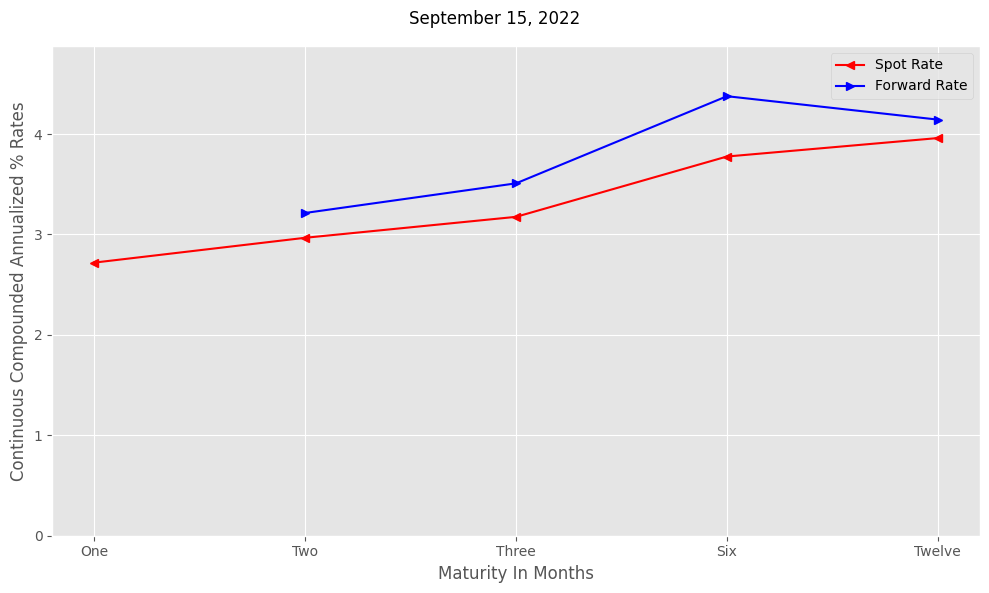

In [ ]:
# Define the labels for the x-axis, representing different maturities.
xaxis = ['One', 'Two', 'Three', 'Six', 'Twelve']

# Define the specific date for which the term structure will be plotted.
string_date = '09/15/2022'

# Get the integer location (row index) of the specified 'string_date' in the DataFrame's index..
loc = Tbill_data_excel.index.get_indexer([string_date])[0]

# Prepare the data to be plotted on the y-axis (as %).
data = [spot_rates[loc]*100, forward_rates[loc]*100]

# Attempt to extract the plot title from the file name.
try:
    title = os.path.splitext(save_config['File'])[0]
#'File Name' key not found or string is too short), set a default title.
except:
    title = 'September 15, 2022'

# Define the names for the data series that will appear in the plot's legend.
series = ['Spot Rate', 'Forward Rate']

# Define the label for the y-axis.
ylabel = 'Continuous Compounded Annualized % Rates'

# Define the label for the x-axis.
xlabel = 'Maturity In Months'

#'data' contains two series (spot and forward rates).
x = len(data)

# Define markers for the plot.
markers = ['<','>']*round(x/2+x%2+0.001)

# Define the lower bound for the y-axis.
lower = 0

# Define the upper bound for the y-axis.
# considering NaN values (not a number) and adds a small buffer (0.5) for padding.
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5

# Define the y-axis limits (minimum and maximum values).
ylim = [lower, upper]

# Define the size of the plot (width, height) in inches.
size = (10, 6)
# Define colors as red and blue
colors=['r','b']
# This function generates and possibly saves a plot.
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)

# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">Accessing T-Bill Data Directly from the Treasury</span>

<span style="display:block; font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
**Figure 1** shows a screenshot of the Treasury page and its data tool, [found here](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates). The time period selected determines the URL for the “Download CSV” link. In our example, the year is set to 2025 and the month is September. As we will see below, the URL includes the string of a four-digit year and a two-digit month (<font color='green'>'202509'</font>).
</span>


<span style="display:block; 
    font-family: 'Garamond', serif;
    text-align: center;
    font-size: 14px;
    line-height: 1.5;">
Figure 1. Accessing T-bill rates.
</span>

<img src='https://docs.google.com/drawings/d/e/2PACX-1vTiHivEYXBe1dqoYji4_KM859JuQ5eyt5zeOOq59grAnhoJFY-Cg-7q610W0YZvPJ9cL7Vi22uC-5me/pub?w=960&h=720'
        style="display:block; margin-left:auto; margin-right:auto; margin-bottom:0; width: 70%; max-width:960px; height:auto; border:none;">

<span style="display:block; 
    font-family: 'Garamond', serif;
    text-align: center;
    font-size: 10.5px;
    line-height: 1.5;
    margin-top:0;">
Source: “Daily Treasury Bill Rates,” US Department of the Treasury, 2025,<br>https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates (accessed Sept. 24, 2025)
</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Changing the URL and using the Pandas method <font color='green'>read_csv</font></span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
 The data is accessed directly from the Treasury as a CSV file, and the code below displays the data row for September 30, 2025. With the exception of the URL value and the <font color='green'>read_csv()</font> versus <font color='green'>read_excel()</font> methods, the code is identical to what we used to create <font color='green'>Tbill_data_excel</font>. In this example, the URL points to a Treasury site instead of Dropbox. The URL is copied by right-clicking the “Download CSV” link on the Treasury website. The URL for a particular year and month is shown below, and <font color='green'>data_date</font> is assigned the string <font color='green'>'202509'</font>. You can assign it any year and month after 2022.<sup>14</sup>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
data_date='202509'
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/'+data_date+'?\
type=daily_treasury_bill_rates&field_tdr_date_value_month=+'data_date'+&page&_format=csv'
```
</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The CSV file is in descending order of the dates. The first row is for September 30 and is displayed with <font color='green'>iloc[0]</font>.
</span>
<br>
<hr>
<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 10.5px;
    text-indent: 0.13in;
    line-height: 1.3;">

<sup>14</sup>&nbsp;As of November 3, 2025, dates prior to 2022 will be moved to a historical page, according to the Treasury. See [US Treasury Data Chart Center](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value=2025).
</span>


In [ ]:
#Read the csv file from the U.S. Treasury website
#Construct the full file path.
data_date='202509'
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/'+data_date+'?\
type=daily_treasury_bill_rates&field_tdr_date_value_month='+data_date+'&page&_format=csv'
print(f"Attempting to load data from {url}")

#Load the data from csv, using the Date column as the index.
try:
    Tbill_data_excel = pd.read_csv(url,index_col='Date')
    # display September 30, 2025 data
    display(Tbill_data_excel.iloc[0])

except FileNotFoundError:
    display("\nERROR: File not found.")
    display("Please check that the 'URL' address")

Attempting to load data from https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/all/202509?type=daily_treasury_bill_rates&field_tdr_date_value_month=202509&page&_format=csv


,09/30/2025
4 WEEKS BANK DISCOUNT,4.05
4 WEEKS COUPON EQUIVALENT,4.12
6 WEEKS BANK DISCOUNT,4.02
6 WEEKS COUPON EQUIVALENT,4.10
8 WEEKS BANK DISCOUNT,4.00
8 WEEKS COUPON EQUIVALENT,4.08
13 WEEKS BANK DISCOUNT,3.86
13 WEEKS COUPON EQUIVALENT,3.95
17 WEEKS BANK DISCOUNT,3.83
17 WEEKS COUPON EQUIVALENT,3.93


# <span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; font-size: 22px; margin-top: 1.0em; margin-bottom: 0.5em; font-style: italic;">Application: Downloading Treasury Data</span>

<span style="display:block;background-color:LightGray;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 15px;
    line-height: 1.5;
    padding: 15px">
    <br>
Access the T-bill data for September 2024 from the US Treasury and display the values for September 12, 2024. For hints, see [Chapter One Hints: Download US Treasury Data September 2024](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#download-data-for-september-2024-from-the-u-s-treasury-and-display-the-values-for-september-12-2024), and check the [expected results here](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#download-data-for-september-2024-from-the-u-s-treasury-and-display-the-values-for-september-12-2024).
<br>
<br>
</span>


## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Using the CSV file to calculate term structure</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The following sections proceed much the same as our earlier process for calculating the term structure and thus need little explanation. We’ll convert banks’ discounts to zero prices, calculate spot and forward rates, and prepare the Notebook for graphing the term structure.
</span>

<hr>

In [ ]:
# Create a list called 'desired_columns' using a list comprehension.
desired_columns = [column for column in Tbill_data_excel.columns if 'BANK' in column]

# Create a DataFrame named 'df_bankers_discount'.
df_bankers_discount = Tbill_data_excel[desired_columns]

# Display the first 5 rows of the newly created 'df_bankers_discount' DataFrame.
df_bankers_discount[:5]

,4 WEEKS BANK DISCOUNT,6 WEEKS BANK DISCOUNT,8 WEEKS BANK DISCOUNT,13 WEEKS BANK DISCOUNT,17 WEEKS BANK DISCOUNT,26 WEEKS BANK DISCOUNT,52 WEEKS BANK DISCOUNT
Date,,,,,,,
09/30/2025,4.05,4.02,4.00,3.86,3.83,3.72,3.53
09/29/2025,4.06,4.03,4.00,3.86,3.83,3.73,3.52
09/26/2025,4.07,4.03,4.00,3.87,3.83,3.74,3.53
09/25/2025,4.08,4.03,4.01,3.89,3.84,3.75,3.54
09/24/2025,4.02,4.02,3.98,3.87,3.81,3.72,3.49


In [ ]:
# The .to_numpy() method strips away the pandas Index and column headers,
# leaving only the raw data values in a highly efficient array format.
bankers_discount=df_bankers_discount.to_numpy()

# --- Verification Step: Display the First 5 Rows of the New Array ---
# After a data type conversion, it is good practice to inspect the result.
bankers_discount[:5]

array([[4.05, 4.02, 4.  , 3.86, 3.83, 3.72, 3.53],
       [4.06, 4.03, 4.  , 3.86, 3.83, 3.73, 3.52],
       [4.07, 4.03, 4.  , 3.87, 3.83, 3.74, 3.53],
       [4.08, 4.03, 4.01, 3.89, 3.84, 3.75, 3.54],
       [4.02, 4.02, 3.98, 3.87, 3.81, 3.72, 3.49]])

<hr>

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Going from bankers’ discounts to zero prices</span>

<hr>

In [ ]:
maturity_days=np.array([4*7,6*7,8*7,13*7,17*7,26*7,52*7]) #Maturity in days calculated
#The price formula divides maturity days by 360 to annualize
#Then divides by 100 to convert to a bill paying one dollar.
zero_prices_one=(100-bankers_discount*maturity_days/360)/100
#NumPy performs element by element calculations: a calculation for each
#value of maturity_days with the corresponding value of bankers_discount
zero_prices_one[:5]   #Display first 5 rows (each row is a trading day for Sept 2025)

array([[0.99685   , 0.99531   , 0.99377778, 0.99024278, 0.98733972,
        0.98119333, 0.96430778],
       [0.99684222, 0.99529833, 0.99377778, 0.99024278, 0.98733972,
        0.98114278, 0.96440889],
       [0.99683444, 0.99529833, 0.99377778, 0.9902175 , 0.98733972,
        0.98109222, 0.96430778],
       [0.99682667, 0.99529833, 0.99376222, 0.99016694, 0.98730667,
        0.98104167, 0.96420667],
       [0.99687333, 0.99531   , 0.99380889, 0.9902175 , 0.98740583,
        0.98119333, 0.96471222]])

<hr>

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Spot rates</span>

<hr>

In [ ]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365) #Maturity_days divided by 365
spot_rates[:5] #Display first 5 rows (last 5 trading days of Sept 2025)

array([[0.04112731, 0.04085421, 0.04068225, 0.03932829, 0.03907985,
        0.03807584, 0.03644461],
       [0.04122902, 0.04095608, 0.04068225, 0.03932829, 0.03907985,
        0.03817917, 0.03633948],
       [0.04133073, 0.04095608, 0.04068225, 0.03943068, 0.03907985,
        0.03828251, 0.03644461],
       [0.04143244, 0.04095608, 0.04078428, 0.03963547, 0.03918254,
        0.03838586, 0.03654976],
       [0.04082219, 0.04085421, 0.04047821, 0.03943068, 0.03887448,
        0.03807584, 0.03602413]])

<hr>

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Forward rates</span>

<hr>

In [ ]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days) #Sign switched
forward_rates=np.insert(forward_rates,0,np.nan,axis=1) #NumPy nan inserted for first month
forward_rates[:5]

array([[       nan, 0.04030802, 0.04016638, 0.03716195, 0.03827242,
        0.03617937, 0.03481338],
       [       nan, 0.0404102 , 0.03986078, 0.03716195, 0.03827242,
        0.0364779 , 0.03449978],
       [       nan, 0.04020678, 0.03986078, 0.03742816, 0.03793965,
        0.03677644, 0.03460671],
       [       nan, 0.04000335, 0.04026888, 0.03779737, 0.03771053,
        0.03688102, 0.03471366],
       [       nan, 0.04091826, 0.03935021, 0.03775464, 0.03706682,
        0.0365673 , 0.03397243]])

<hr>

### <span style="font-family: 'Franklin Gothic Book', sans-serif; font-size: 14px; font-style: italic; margin-left: 0.5in;">Preparing the notebook</span>

<hr>

In [ ]:
parent,folder,subfolder=parent_folder_subfolder()

### **✅ Parent Directory.../content/drive/MyDrive**

###  **❌ No  Folder**

### **❌ No Subfolder**

<hr>


# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;">Graphing the Term Structure (Again)</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
 As in the graph of the term structure for September 15, 2022, no values will be assigned to the <font color='green'>save_config</font> dictionary and the generated graph will not be saved.
</span>




In [ ]:
save_config={}

'''
save_config['Parent']=parent
save_config['Folder']=folder
save_config['Subfolder']=subfolder
save_config['File']='T-Bill Term Structure: 9-15-2022.pdf'
'''

"\nsave_config['Parent']=parent\nsave_config['Folder']=folder\nsave_config['Subfolder']=subfolder\nsave_config['File']='T-Bill Term Structure: 9-15-2022.pdf'\n"

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Graphing the spot and forward rates for September 30, 2025</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Recall that the September 2022 T-bill data had five maturity dates. The September 2025 data has two additional dates: <font color='green'>'6 WEEKS'</font> and <font color='green'>'17 WEEKS'</font>. In the following code, the *x*-axis is set at the bills’ seven maturities in months. Forward and spot rates are calculated for the month of September 2025, and the data for September 30, 2025, is plotted.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
xaxis=['One','One & Half','Two','Three','Four','Six','Twelve']
string_date='09/15/2022'
```
</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The first row of <font color='green'>spot_rates</font> and <font color='green'>forward_rates</font> correspond to September 30. The spot- and forward-rate rows for September 30, 2025, are then multiplied by 100 and assigned to the list <font color='green'>data</font>.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
data=[spot_rates[0]*100,forward_rates[0]*100]
```

</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The plot title is assigned whatever value is assigned to <font color='green'>save_config['File Name']</font> (minus the PDF extension).
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
try:                    
  title = os.path.splitext(save_config['File'])              
except:
  title='September 30, 2025'
```

</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Series names, labels, and markers are then assigned.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
```

</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
The upper limit of the *y*-axis is assigned to <font color='green'>upper</font> and calculated from the maximum value of the spot and forward rates. As before, the NumPy method <font color='green'>nanmax()</font> ignores <font color='green'>nan</font> values. The maximum of <font color='green'>nanmax()</font> of spot rates (<font color='green'>data[0]</font>) and forward rates (<font color='green'>data[1]</font>) plus 0.5% are assigned to <font color='green'>upper </font>. The lower limit is set to 0, and the size and colors of the lines are once again set as 10 inches wide and 6 inches tall (10,6) and red and blue, respectively.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)
colors=['r','b']
```

</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
Finally, the graph is generated and saved with <font color='green'>one_y_axis()</font>.
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)
```

</span>

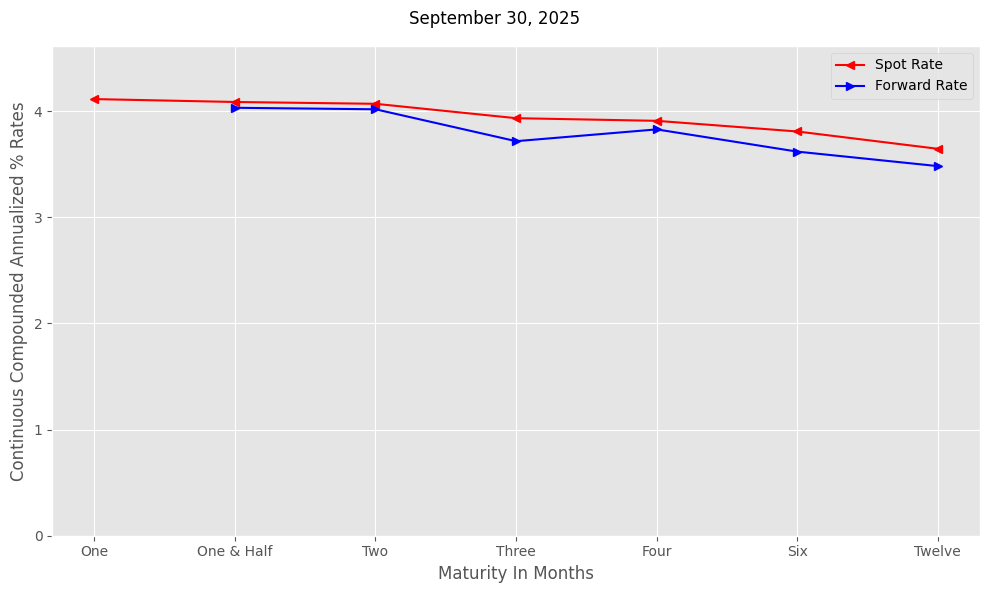

In [ ]:
# Define the labels for the x-axis, representing different maturities.
xaxis = ['One','One & Half', 'Two', 'Three','Four', 'Six', 'Twelve']

# Define the specific date for which the term structure will be plotted.
string_date = '09/30/2022'


# Prepare the data to be plotted on the y-axis (as %).
data = [spot_rates[0]*100, forward_rates[0]*100]

# Attempt to extract the plot title from the file name.
try:
    title = os.path.splitext(save_config['File'])[0]
#'File Name' key not found or string is too short), set a default title.
except:
    title = 'September 30, 2025'

# Define the names for the data series that will appear in the plot's legend.
series = ['Spot Rate', 'Forward Rate']

# Define the label for the y-axis.
ylabel = 'Continuous Compounded Annualized % Rates'

# Define the label for the x-axis.
xlabel = 'Maturity In Months'

#'data' contains two series (spot and forward rates).
x = len(data)

# Define markers for the plot.
markers = ['<','>']*round(x/2+x%2+0.001)

# Define the lower bound for the y-axis.
lower = 0

# Define the upper bound for the y-axis.
# considering NaN values (not a number) and adds a small buffer (0.5) for padding.
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5

# Define the y-axis limits (minimum and maximum values).
ylim = [lower, upper]

# Define the size of the plot (width, height) in inches.
size = (10, 6)
# Define colors as red and blue
colors=['r','b']
# This function generates and possibly saves a plot.
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)

# <span style="font-family: 'Franklin Gothic Medium', sans-serif; font-size: 14px; font-weight: 500; margin-left: 0;"> Python, Pandas, NumPy, and Financial Insights</span>

<span style="display:block; 
    font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
In this chapter, we used Pandas and NumPy to explore different ways of calculating the term structure of interest rates for September 15, 2022, and September 30, 2025. These term structures reveal an economy in transition. On September 15, 2022, rates were increasing with maturity and could be expected to continue rising. By September 30, 2025, however, the pattern had shifted. Although the overall level of rates was higher on September 30, 2025, the term structure showed a slight downward slope. These differences indicate two different economic states: one in which inflation was expected to increase (September 2022) and one in which it wasn’t (September 2025). Calibrating the term structure of interest rates this way has highlighted Python’s rich ecosystem of libraries and methods, and more importantly, shown us the language’s utility for finance.
</span>

## <span style="font-family: 'Franklin Gothic Book', sans-serif;font-size: 14px; font-weight: 400; margin-left: 0.25in;">Summarizing key points</span>

<ul style="font-family: 'Garamond', serif;
    font-size: 14px;
    line-height: 2;">
<li>The present value function describes all bonds as a portfolio of zero-coupon bonds.</li>
<li>Data was accessed directly from the Treasury as a CSV file and assigned to a Pandas Dataframe.</li>
<li>The term structure of interest rates describes the behavior of spot and forward interest rates.</li>
<li>The term structure of interest rates was calculated with T-bills for September 2022.</li>
<li>The term structure was graphed for September 15, 2022, and September 30, 2025.</li>
</ul>

<hr>

# <span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; font-size: 22; margin-top: 1.0em; margin-bottom: 0em; font-style: italic;">Chapter Exercise</span>
<span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; font-size: 17; margin-top: 0; margin-bottom: 0.5em; font-style: italic;">Calculating and Plotting Spot and Forward Rates</span>

<span style="display:block;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 17px;
    line-height: 1.5;
    padding: 15px">
Using the data from September 12, 2024:<br></span>
<span style="display:block; 
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 15px;
    line-height: 2;">
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;Calculate spot and forward rates.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;Plot the spot and forward rates.<br></span>
<span style="display:block;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    font-size: 15px;
    line-height: 1.5;
    padding: 15px">
<br>For hints, see [Chapter One Hints](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#chapter-one-exercise). Check the [expected results here](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#chapter-one-exercise).

</span>